0.7.1
   A  B  C  D
A  0  0  0  0
B  1  0  0  0
C  3  1  0  0
D  0  1  1  0


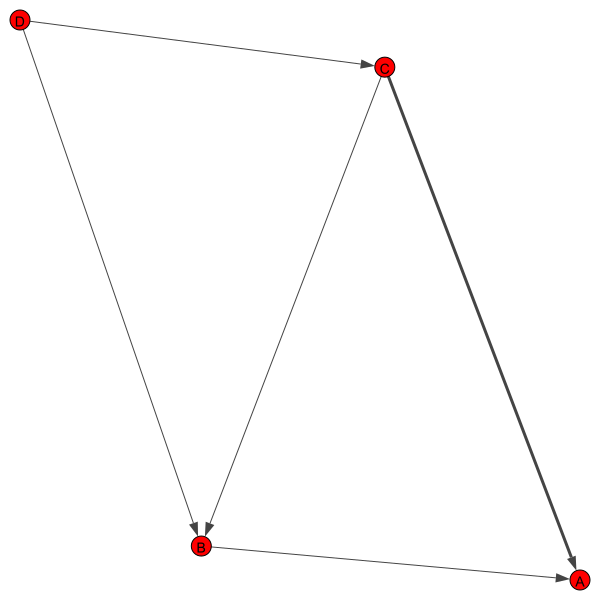

In [25]:
import pandas as pd
from igraph import *

print igraph.__version__

a = pd.read_csv('matrice.csv', header=0, index_col=0, sep=';')

print a

# Get the values as np.array, it's more convenenient.
A = a.values

# Create graph, A.astype(bool).tolist() or (A / A).tolist() can also be used.
graphe = igraph.Graph.Adjacency((A > 0).tolist())

# Add edge weights and node labels.
graphe.es['weight'] = A[A.nonzero()]
graphe.vs['label'] = a.index # or a.index/a.columns
graphe.vs['name'] = graphe.vs['label']
graphe.es['width'] = A[A.nonzero()]

layout = graphe.layout("kk")
plot(graphe, layout=layout)

In [26]:
res = Graph.shortest_paths_dijkstra(graphe,source='A',target='D', mode='IN')
print res

[[2]]
